In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
population_data=pd.read_csv("./Resources/pop_density_censusNY_project.csv")
population_data

,FIPS Code,Geography,Year,Program Type,Population,County,Land Area (sq mi.),Population Density (person/sq.mi.),Pop Density Growth Percentage
0,36001,Albany County,1980,Census Base Population,285909,Albany,522.80,546.880260,-0.290505
1,36001,Albany County,1990,Census Base Population,292812,Albany,522.80,560.084162,2.414405
2,36001,Albany County,2000,Census Base Population,294601,Albany,522.80,563.506121,0.610972
3,36001,Albany County,2010,Census Base Population,304199,Albany,522.80,581.864958,3.257966
4,36001,Albany County,2020,Census Base Population,314848,Albany,522.80,602.234124,3.500669
...,...,...,...,...,...,...,...,...,...
315,11111,ALL,1980,Census Base Population,35116330,NY State,94252.78,372.576066,-3.745471
316,11112,ALL,1990,Census Base Population,35981556,NY State,94252.78,381.755912,2.463885
317,11113,ALL,2000,Census Base Population,37954052,NY State,94252.78,402.683634,5.481964
318,11114,ALL,2010,Census Base Population,38756234,NY State,94252.78,411.194598,2.113561


In [3]:
percapita_data=pd.read_csv("./Resources/NY_per_county_capita_income_project.csv")
percapita_data

,state,Geography,Year,per_capita_income,GR percapita,GR percapita percentage
0,New York,Albany County,1980,10720,1.223605,122.360506
1,New York,Albany County,1990,23687,1.209608,120.960821
2,New York,Albany County,2000,35886,0.515008,51.500823
3,New York,Albany County,2010,46273,0.289444,28.944435
4,New York,Albany County,2020,67115,0.450414,45.041385
...,...,...,...,...,...,...
310,New York,ALL,1980,11001,1.235976,123.597561
311,New York,ALL,1990,23990,1.180711,118.071084
312,New York,ALL,2000,36090,0.504377,50.437682
313,New York,ALL,2010,48768,0.351288,35.128845


In [4]:
merged_data=pd.merge(population_data,percapita_data,on=["Geography","Year"],how="left")
merged_data

,FIPS Code,Geography,Year,Program Type,Population,County,Land Area (sq mi.),Population Density (person/sq.mi.),Pop Density Growth Percentage,state,per_capita_income,GR percapita,GR percapita percentage
0,36001,Albany County,1980,Census Base Population,285909,Albany,522.80,546.880260,-0.290505,New York,10720.0,1.223605,122.360506
1,36001,Albany County,1990,Census Base Population,292812,Albany,522.80,560.084162,2.414405,New York,23687.0,1.209608,120.960821
2,36001,Albany County,2000,Census Base Population,294601,Albany,522.80,563.506121,0.610972,New York,35886.0,0.515008,51.500823
3,36001,Albany County,2010,Census Base Population,304199,Albany,522.80,581.864958,3.257966,New York,46273.0,0.289444,28.944435
4,36001,Albany County,2020,Census Base Population,314848,Albany,522.80,602.234124,3.500669,New York,67115.0,0.450414,45.041385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,11111,ALL,1980,Census Base Population,35116330,NY State,94252.78,372.576066,-3.745471,New York,11001.0,1.235976,123.597561
316,11112,ALL,1990,Census Base Population,35981556,NY State,94252.78,381.755912,2.463885,New York,23990.0,1.180711,118.071084
317,11113,ALL,2000,Census Base Population,37954052,NY State,94252.78,402.683634,5.481964,New York,36090.0,0.504377,50.437682
318,11114,ALL,2010,Census Base Population,38756234,NY State,94252.78,411.194598,2.113561,New York,48768.0,0.351288,35.128845


In [5]:
sample_data=merged_data.loc[merged_data["Geography"]=="Albany County"]

sample_data


,FIPS Code,Geography,Year,Program Type,Population,County,Land Area (sq mi.),Population Density (person/sq.mi.),Pop Density Growth Percentage,state,per_capita_income,GR percapita,GR percapita percentage
0,36001,Albany County,1980,Census Base Population,285909,Albany,522.8,546.880260,-0.290505,New York,10720.0,1.223605,122.360506
1,36001,Albany County,1990,Census Base Population,292812,Albany,522.8,560.084162,2.414405,New York,23687.0,1.209608,120.960821
2,36001,Albany County,2000,Census Base Population,294601,Albany,522.8,563.506121,0.610972,New York,35886.0,0.515008,51.500823
3,36001,Albany County,2010,Census Base Population,304199,Albany,522.8,581.864958,3.257966,New York,46273.0,0.289444,28.944435
4,36001,Albany County,2020,Census Base Population,314848,Albany,522.8,602.234124,3.500669,New York,67115.0,0.450414,45.041385


<IPython.core.display.Javascript object>


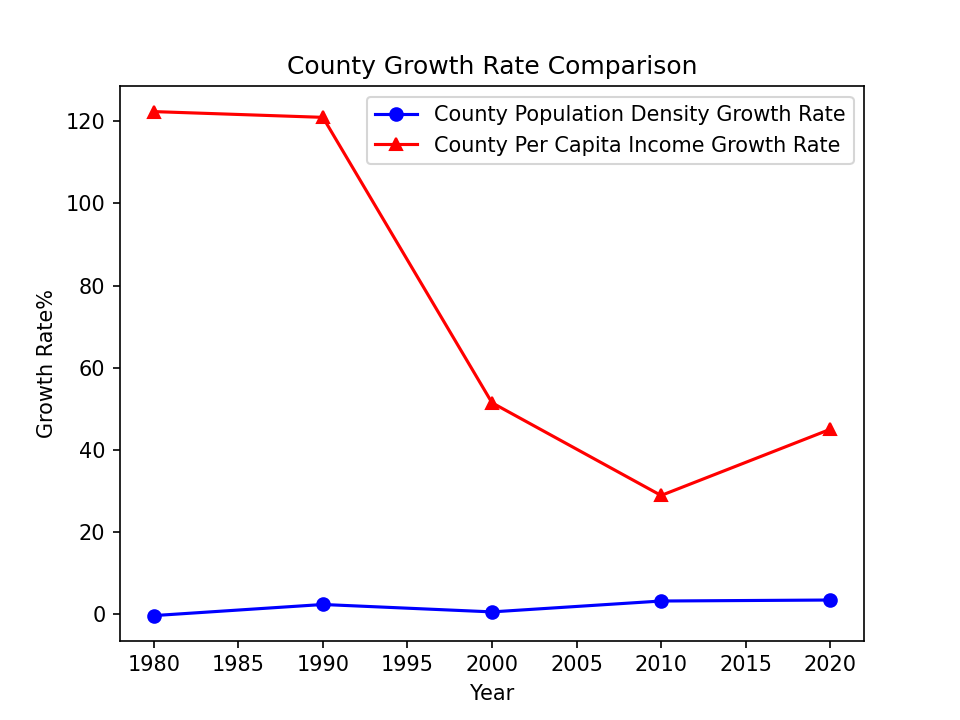

In [6]:
poprate = sample_data["Pop Density Growth Percentage"]
pcapitarate = sample_data["GR percapita percentage"]
x_axis=sample_data["Year"]

poprate_handle, = plt.plot(x_axis, poprate, marker ='o', color='blue', label="County Population Density Growth Rate")
pcapitarate_handle, = plt.plot(x_axis, pcapitarate, marker='^', color='red', label="County Per Capita Income Growth Rate")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Growth Rate%")
plt.title("County Growth Rate Comparison")
plt.show()


In [17]:
ny_state = sample_data1["Pop Density Growth Percentage"]
ny_statepc = sample_data1["GR percapita percentage"]
x_axiss=sample_data["Year"]

ny_state_handle, = plt.plot(x_axis, ny_state, marker ='*', color='orange', label="NY State Population Density Growth Rate")
ny_statepc_handle, = plt.plot(x_axis, ny_statepc, marker ='*', color='green', label="NY State Per Capita Income Growth Rate")

plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Growth Rate%")
plt.title("State VS Sample County Growth Rate Comparison")
plt.show()


<IPython.core.display.Javascript object>


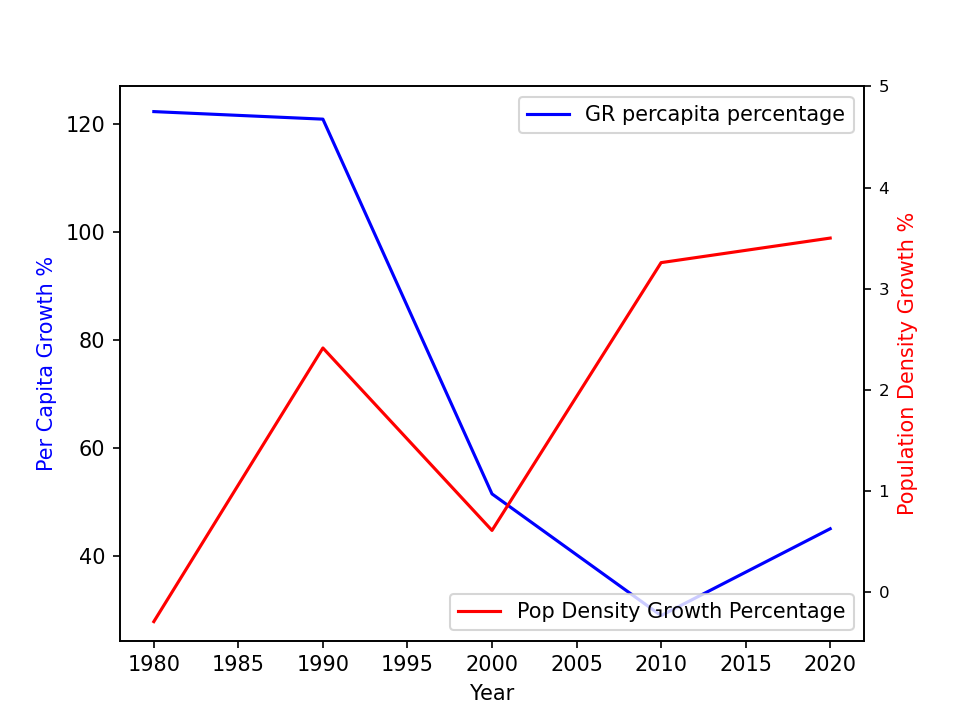

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


sample_data.plot(x='Year', y="GR percapita percentage", ax=ax1, color='blue')
sample_data.plot(x='Year', y="Pop Density Growth Percentage", ax=ax2, color='red')


ax1.set_ylabel("Per Capita Growth %", color='blue')
ax2.set_ylabel("Population Density Growth %", color='red')

ax2.tick_params(axis="y", labelsize=8)
ax2.set_yticks([0, 1, 2, 3, 4, 5])

plt.legend(loc="lower right")
plt.show()





In [15]:
sample_data1=merged_data.loc[merged_data["Geography"]=="ALL"]
sample_data1

,FIPS Code,Geography,Year,Program Type,Population,County,Land Area (sq mi.),Population Density (person/sq.mi.),Pop Density Growth Percentage,state,per_capita_income,GR percapita,GR percapita percentage
315,11111,ALL,1980,Census Base Population,35116330,NY State,94252.78,372.576066,-3.745471,New York,11001.0,1.235976,123.597561
316,11112,ALL,1990,Census Base Population,35981556,NY State,94252.78,381.755912,2.463885,New York,23990.0,1.180711,118.071084
317,11113,ALL,2000,Census Base Population,37954052,NY State,94252.78,402.683634,5.481964,New York,36090.0,0.504377,50.437682
318,11114,ALL,2010,Census Base Population,38756234,NY State,94252.78,411.194598,2.113561,New York,48768.0,0.351288,35.128845
319,11115,ALL,2020,Census Base Population,40402498,NY State,94252.78,428.661075,4.247740,New York,71577.0,0.467704,46.770423


<IPython.core.display.Javascript object>


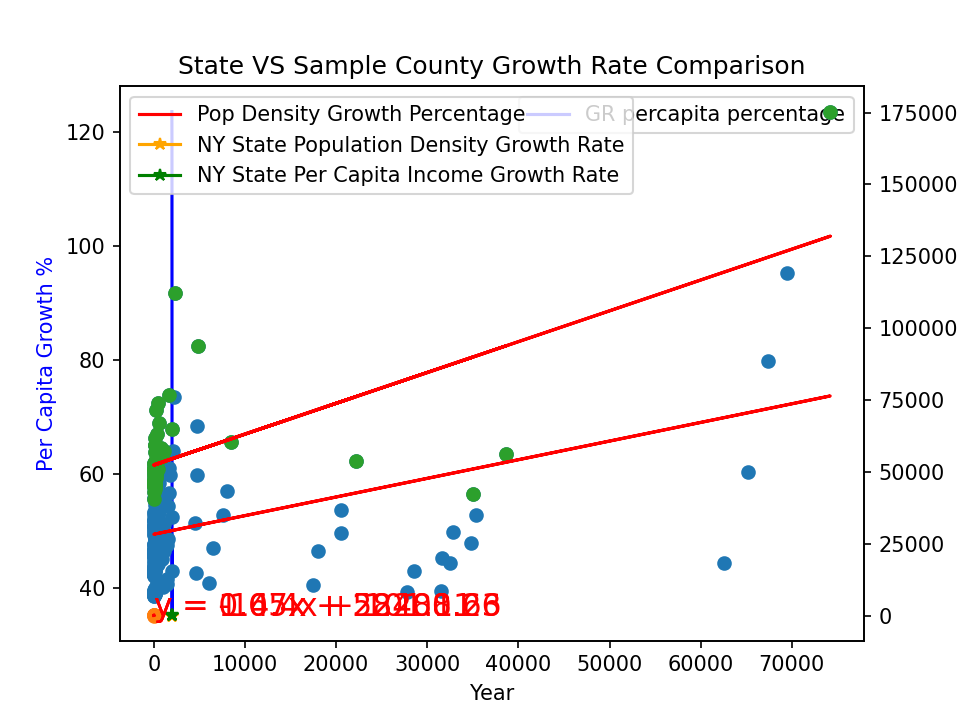

TypeError: __init__() got an unexpected keyword argument 'labelsize'

In [16]:
sample_dataA=merged_data.loc[merged_data["Geography"]=="ALL"]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


sample_dataA.plot(x='Year', y="GR percapita percentage", ax=ax1, color='blue')
sample_dataA.plot(x='Year', y="Pop Density Growth Percentage", ax=ax2, color='red')


ax1.set_ylabel("Per Capita Growth %", color='blue')
ax2.set_ylabel("Population Density Growth %", color='red')

ax2.tick_params(axis="y")
# ax2.set_yticks([0, 1, 2, 3, 4, 5])

plt.legend(loc="best",labelsize=1)
plt.show()

In [18]:
merged_datax=merged_data.loc[merged_data["Geography"]!="ALL",:]
merged_datax0=merged_datax.loc[merged_data["Geography"]!="New York State",:]


popratex = merged_datax0["Population Density (person/sq.mi.)"]
pcapitaratex = merged_datax0["per_capita_income"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(popratex, pcapitaratex)
regress_values = popratex * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(popratex,pcapitaratex)
plt.plot(popratex,regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")
plt.xlabel('Population Density Per County')
plt.ylabel('Per Capita Income Per County')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.11455162013641712


In [19]:

merged_datax1=merged_datax0.loc[merged_datax0["Geography"]=="Albany County",:]

popratex1 = merged_datax1["Pop Density Growth Percentage"]
pcapitaratex1 = merged_datax1["GR percapita percentage"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(popratex1, pcapitaratex1)
regress_values = popratex1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(popratex1,pcapitaratex1)
plt.plot(popratex1,regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")
plt.xlabel('Population Density Growth%')
plt.ylabel('Per Capita Income Growth %')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.29158801721211686


In [20]:
merged_datax2=merged_datax0.loc[merged_datax0["Year"]==2020,:]
popratex2 = merged_datax2["Population Density (person/sq.mi.)"]
pcapitaratex2 = merged_datax2["per_capita_income"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(popratex2, pcapitaratex2)
regress_values = popratex2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(popratex2,pcapitaratex2)
plt.plot(popratex2,regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")
plt.xlabel('Population Density Per County')
plt.ylabel('Per Capita Income Per County')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.4072628919471934
